In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.io import fits
import healpy as hp
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from astropy import wcs
import matplotlib
import coop_setup_funcs as csf
from astropy.cosmology import Planck15 as cosmo, z_at_value
from astropy import units as u

In [6]:
# functions

def get_peakinfo(filename):
    peakfile = fits.open(filename)
    peakinfo = peakfile[0].data
    rot_angle = peakinfo[:,3]
    theta,phi = peakinfo[:,1], peakinfo[:,2]
    dec = []
    ra  = []
    for i in range(len(theta)):
        dec.append(csf.ThetaPhitoRaDec(theta[i],phi[i])[1])
        ra.append(csf.ThetaPhitoRaDec(theta[i],phi[i])[0])

    ra = np.asarray(ra)
    dec = np.asarray(dec)
    return (rot_angle,ra,dec)
    peakfile.close()


In [7]:
#Buzzard
rot_angle_b = []
ra_b = []
dec_b = []

rot_angle_b_nocuts = []
ra_b_nocuts = []
dec_b_nocuts = []

for reg in range(24):
    rot_angle, ra, dec = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/Buzzard_tSZ_rmpks/{0}/Buzzard_lambdagt10_reg{0}_1418_1945Mpc_nugt2_egtpt3_13pt9_pks.fits".format(reg))
    rot_angle_noc, ra_noc, dec_noc = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/Buzzard_tSZ_rmpks/{0}/Buzzard_lambdagt10_reg{0}_1418_1945Mpc_allnu_alle_13pt9_pks.fits".format(reg))
    rot_angle_b.append(rot_angle)
    ra_b.append(ra)
    dec_b.append(dec)
    rot_angle_b_nocuts.append(rot_angle_noc)
    ra_b_nocuts.append(ra_noc)
    dec_b_nocuts.append(dec_noc)

rot_angle_b = np.concatenate(rot_angle_b)
ra_b = np.concatenate(ra_b)
dec_b = np.concatenate(dec_b)
rot_angle_b_nocuts = np.concatenate(rot_angle_b_nocuts)
ra_b_nocuts = np.concatenate(ra_b_nocuts)
dec_b_nocuts = np.concatenate(dec_b_nocuts)

In [26]:
# get lambda info from Buzzard
object_path = "/mnt/raid-cita/mlokken/buzzard/catalogs/small_region_buzzard_1.9.9_3y3a_rsshift_run_redmapper_v0.5.1_lgt05_vl50_catalog.fit"
ra,dec,z,richness = csf.get_radeczlambda(object_path)
rich_cond = richness > 10
z_cond =(z > z_at_value(cosmo.comoving_distance, 1418*u.Mpc)) & (z<z_at_value(cosmo.comoving_distance, 1945*u.Mpc))
ra,dec,z,richness  = ra[rich_cond&z_cond], dec[rich_cond&z_cond], z[rich_cond&z_cond], richness[rich_cond&z_cond]


In [28]:
ra_lambda = np.zeros([len(ra),2])
ra_lambda[:,0] = ra
ra_lambda[:,1] = richness

In [64]:
lambda_after_cuts = []
z_after_cuts = []
for r in ra_b:
    for i in range(len(ra_lambda)):
        if abs(r - ra_lambda[i,0]) < 0.003:
            lambda_after_cuts.append(ra_lambda[i,1])
            z_after_cuts.append(z[i])

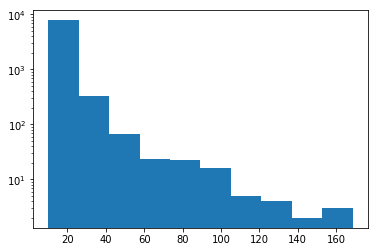

In [80]:

plt.hist(richness)
plt.gca().set_yscale('log')


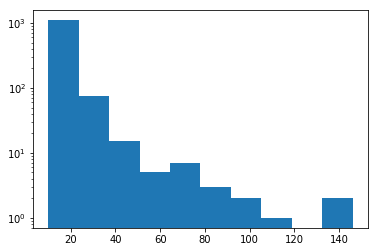

In [81]:
plt.hist(lambda_after_cuts)
plt.gca().set_yscale('log')


Text(0.5,0,'redshift')

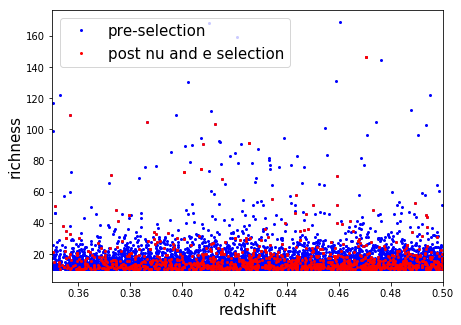

In [76]:
plt.figure(figsize=[7,5])
plt.plot(z, richness, 'bo', markersize=2, label='pre-selection')
plt.plot(z_after_cuts, lambda_after_cuts, 'ro', markersize=2, label='post nu and e selection')
plt.xlim([.35,.5])
plt.ylabel("richness", fontsize=15)
plt.legend(fontsize=15)
plt.xlabel("redshift", fontsize=15)


(0, 100)

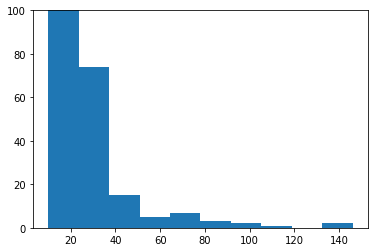

In [54]:
plt.hist(lambda_after_cuts)
plt.ylim([0,100])

In [25]:
ra_b_nocuts

array([ 78.38745148,  78.32153333,  81.05712654, ..., 341.32362271,
       343.60397699, 344.98170811])

In [12]:
indices = []
i = 0
for ra1 in ra:
    for ra2 in ra_b:
        if abs(ra1-ra2)<0.001:
            

issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match
issa match

KeyboardInterrupt: 